In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [3]:
totaldataset = pd.read_csv("data.csv")

In [4]:
import random
# Original dataset has 92,000 rows and 1025 cols
# selection 40000 rows at random for testing for now
a=random.sample(range(0,92000), 40000)
dataset=totaldataset.loc[a]

In [5]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
8773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_05_kna
57108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_29_waw
88671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_8
1366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
43725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_22_pha


In [6]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [7]:
num_pixels = X.shape[1]
# 46 characters, consonants "ka" to "gya", and the digits 0 to 9
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [8]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

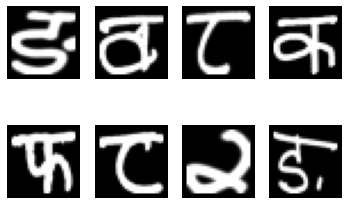

In [9]:
for i in range(1,9):
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binecoder = LabelBinarizer()
Y = binecoder.fit_transform(y)

In [11]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [12]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [13]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
model = cnn_model()

In [15]:
early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 200
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/10
128/128 - 5s - loss: 2.0514 - accuracy: 0.4606 - val_loss: 0.8507 - val_accuracy: 0.7672
Epoch 2/10
128/128 - 4s - loss: 0.6589 - accuracy: 0.8050 - val_loss: 0.4664 - val_accuracy: 0.8695
Epoch 3/10
128/128 - 4s - loss: 0.3948 - accuracy: 0.8809 - val_loss: 0.3292 - val_accuracy: 0.9055
Epoch 4/10
128/128 - 4s - loss: 0.2925 - accuracy: 0.9106 - val_loss: 0.2931 - val_accuracy: 0.9139
Epoch 5/10
128/128 - 4s - loss: 0.2193 - accuracy: 0.9334 - val_loss: 0.2411 - val_accuracy: 0.9306
Epoch 6/10
128/128 - 4s - loss: 0.1777 - accuracy: 0.9471 - val_loss: 0.2352 - val_accuracy: 0.9286
Epoch 7/10
128/128 - 4s - loss: 0.1525 - accuracy: 0.9522 - val_loss: 0.2046 - val_accuracy: 0.9419
Epoch 8/10
128/128 - 4s - loss: 0.1216 - accuracy: 0.9622 - val_loss: 0.1937 - val_accuracy: 0.9483
Epoch 9/10
128/128 - 4s - loss: 0.0996 - accuracy: 0.9690 - val_loss: 0.1875 - val_accuracy: 0.9456
Epoch 10/10
128/128 - 4s - loss: 0.0851 - accuracy: 0.9725 - val_loss: 0.2023 - val_accuracy: 0.9400

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.16%


In [35]:
X.iloc[0]

pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
pixel_0004    0
             ..
pixel_1019    0
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
Name: 8773, Length: 1024, dtype: int64

In [50]:
y.shape

(40000,)

In [41]:
predictions = model.predict(X_test)
print(predictions.shape)
# plt.matshow(predictions[0])

(8000, 46)


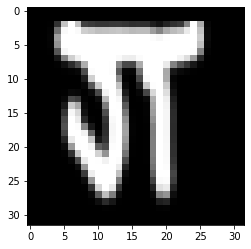

In [62]:
test_img = X_test.reshape(X_test.shape[0],img_width,img_height)
plt.imshow(test_img[0],cmap=plt.get_cmap('gray'))

In [56]:
y_test[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
np.argmax(predictions[0])

2

In [53]:
y.shape

(40000,)

In [57]:
X_test[0]

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)